<a href="https://colab.research.google.com/github/KoalaGeo/HMO_Registry_Notebooks/blob/main/HMO_2019_2024_Loughborough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# Install necessary libraries if not already installed
!pip install pandas matplotlib seaborn numpy requests h3 contextily

print("Installation finished!")

Installation finished!


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps as cm
import numpy as np
import h3
print(h3.__version__)

print("installation finished!")

4.2.2
installation finished!


In [53]:
# prompt: import csv from https://github.com/KoalaGeo/HMO_Registry_Notebooks/blob/main/data/CBC_HMO_Register_190227.csv

import pandas as pd
import requests
from io import StringIO

# URLs of the CSV files
url_2019 = "https://raw.githubusercontent.com/KoalaGeo/HMO_Registry_Notebooks/main/data/CBC_HMO_Register_190227.csv"
url_2024 = "https://raw.githubusercontent.com/KoalaGeo/HMO_Registry_Notebooks/main/data/CBC_HMO_Register_240219.csv"

def load_csv_from_url(url):
    """Loads a CSV file from a URL into a pandas DataFrame."""
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
        csv_data = StringIO(response.text)
        df = pd.read_csv(csv_data)
        return df
    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL: {e}")
        return None
    except pd.errors.ParserError as e:
        print(f"Error parsing CSV: {e}")
        return None

# Load the 2019 data
df_2019_original = load_csv_from_url(url_2019)

# Load the 2024 data
df_2024_original = load_csv_from_url(url_2024)

# Display the first few rows of each DataFrame to verify
if df_2019_original is not None:
    print("2019 Data:")
    print(df_2019_original.head())
else:
    print("Failed to load 2019 data.")

if df_2024_original is not None:
    print("\n2024 Data:")
    print(df_2024_original.head())
else:
    print("Failed to load 2024 data.")


2019 Data:
           uprn house number          street          town  postcode  \
0   10004000811            3       Adam Dale  Loughborough  LE11 3HD   
1   10004000813            5       Adam Dale  Loughborough  LE11 3HD   
2   10004000818           10       Adam Dale  Loughborough  LE11 3HD   
3  100030430594          222  Alan Moss Road  Loughborough  LE11 4LZ   
4   10012191560         238a  Alan Moss Road  Loughborough  LE11 4LZ   

     licence expiry  permitted no of occupiers  
0  11 November 2023                          6  
1  07 February 2024                          5  
2   15 October 2022                          6  
3  16 November 2023                          5  
4     10 April 2023                          6  

2024 Data:
           uprn house name                      house number  \
0  100030453388        NaN                                69   
1  100030453391        NaN                                72   
2   10023778152    Flat 1   Great Central Apartments      

In [54]:
# Descriptive statistics
if df_2019_original is not None:
    # Convert 'uprn' to category
    if 'uprn' in df_2019_original.columns:
        df_2019_original['uprn'] = df_2019_original['uprn'].astype('category')

    print("Descriptive Statistics - 2019 Data:")
    print(df_2019_original.describe(include='all'))

    count_unique_uprn = df_2019_original['uprn'].nunique()
    print(f"Unique UPRNs (using nunique()): {count_unique_uprn}")
else:
    print("Failed to load 2019 data.")

if df_2024_original is not None:
    # Convert 'uprn' to category
    if 'uprn' in df_2024_original.columns:
        df_2024_original['uprn'] = df_2024_original['uprn'].astype('category')

    print("Descriptive Statistics - 2019 Data:")
    print(df_2024_original.describe(include='all'))

    count_unique_uprn = df_2024_original['uprn'].nunique()
    print(f"Unique UPRNs (using nunique()): {count_unique_uprn}")
else:
    print("Failed to load 2019 data.")

#Example of checking the data types of each dataframe before describe is called.
if df_2019_original is not None:
  print("\n2019 Data types:\n",df_2019_original.dtypes)

if df_2024_original is not None:
  print("\n2024 Data types:\n",df_2024_original.dtypes)

Descriptive Statistics - 2019 Data:
                uprn house number          street          town  postcode  \
count   4.920000e+02          492             492           492       492   
unique  4.910000e+02          170             115             3       157   
top     1.000305e+11            2  Leopold Street  Loughborough  LE11 3DA   
freq    2.000000e+00           12              26           490        19   
mean             NaN          NaN             NaN           NaN       NaN   
std              NaN          NaN             NaN           NaN       NaN   
min              NaN          NaN             NaN           NaN       NaN   
25%              NaN          NaN             NaN           NaN       NaN   
50%              NaN          NaN             NaN           NaN       NaN   
75%              NaN          NaN             NaN           NaN       NaN   
max              NaN          NaN             NaN           NaN       NaN   

          licence expiry  permitted no 

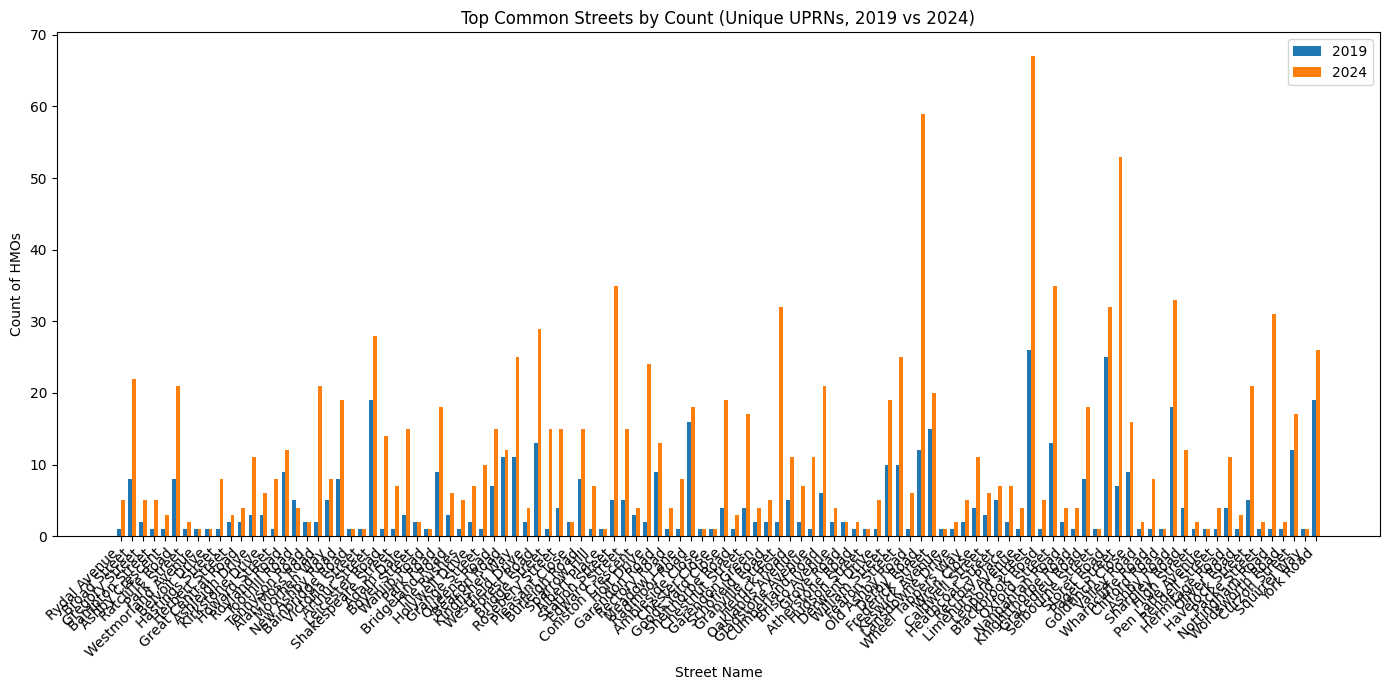

In [55]:
if df_2019_original is not None and df_2024_original is not None:
    # Filter for unique UPRNs and get street counts for 2019
    df_2019_unique = df_2019_original.drop_duplicates(subset='uprn')
    street_counts2019 = df_2019_unique['street'].value_counts().to_dict()

    # Filter for unique UPRNs and get street counts for 2024
    df_2024_unique = df_2024_original.drop_duplicates(subset='uprn')
    street_counts2024 = df_2024_unique['street'].value_counts().to_dict()

    # Sort and get top for 2019
    top_streets_2019 = dict(sorted(street_counts2019.items(), key=lambda item: item[1], reverse=True)[:300])
    street_names_2019 = list(top_streets_2019.keys())
    street_counts_values_2019 = list(top_streets_2019.values())

    # Sort and get top for 2024
    top_streets_2024 = dict(sorted(street_counts2024.items(), key=lambda item: item[1], reverse=True)[:300])
    street_names_2024 = list(top_streets_2024.keys())
    street_counts_values_2024 = list(top_streets_2024.values())

    # Find common top 10 streets
    common_streets = list(set(street_names_2019).intersection(set(street_names_2024)))

    # Filter data for common streets
    counts_2019_common = [top_streets_2019.get(street, 0) for street in common_streets]
    counts_2024_common = [top_streets_2024.get(street, 0) for street in common_streets]

    # Create the grouped bar chart
    x = range(len(common_streets))
    width = 0.35

    plt.figure(figsize=(14, 7))
    plt.bar([i - width/2 for i in x], counts_2019_common, width, label='2019')
    plt.bar([i + width/2 for i in x], counts_2024_common, width, label='2024')

    plt.xlabel('Street Name')
    plt.ylabel('Count of HMOs')
    plt.title('Top Common Streets by Count (Unique UPRNs, 2019 vs 2024)')
    plt.xticks(x, common_streets, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

else:
    print("Failed to load data.")

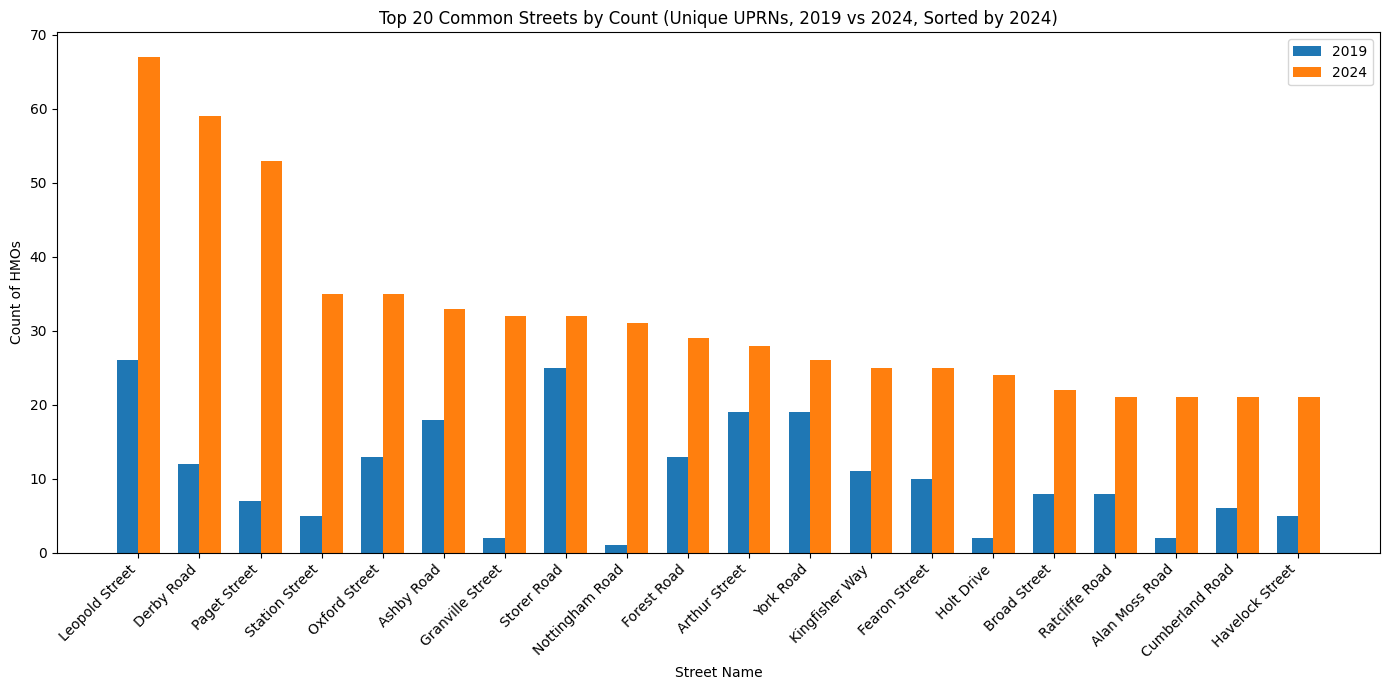

In [56]:
import matplotlib.pyplot as plt

if df_2019_original is not None and df_2024_original is not None:
    # Filter for unique UPRNs and get street counts for 2019
    df_2019_unique = df_2019_original.drop_duplicates(subset='uprn')
    street_counts2019 = df_2019_unique['street'].value_counts().to_dict()

    # Filter for unique UPRNs and get street counts for 2024
    df_2024_unique = df_2024_original.drop_duplicates(subset='uprn')
    street_counts2024 = df_2024_unique['street'].value_counts().to_dict()

    # Sort and get top for 2019
    top_streets_2019 = dict(sorted(street_counts2019.items(), key=lambda item: item[1], reverse=True)[:300])
    street_names_2019 = list(top_streets_2019.keys())
    street_counts_values_2019 = list(top_streets_2019.values())

    # Sort and get top for 2024
    top_streets_2024 = dict(sorted(street_counts2024.items(), key=lambda item: item[1], reverse=True)[:300])
    street_names_2024 = list(top_streets_2024.keys())
    street_counts_values_2024 = list(top_streets_2024.values())

    # Find common streets
    common_streets = list(set(street_names_2019).intersection(set(street_names_2024)))

    # Filter data for common streets
    counts_2019_common = [top_streets_2019.get(street, 0) for street in common_streets]
    counts_2024_common = [top_streets_2024.get(street, 0) for street in common_streets]

    # Combine common streets with counts for sorting
    combined_data = list(zip(common_streets, counts_2019_common, counts_2024_common))

    # Sort by 2024 counts in descending order
    sorted_data = sorted(combined_data, key=lambda x: x[2], reverse=True)

    # Extract sorted data for plotting, limiting to the top 20
    sorted_streets = [item[0] for item in sorted_data[:20]]
    sorted_counts_2019 = [item[1] for item in sorted_data[:20]]
    sorted_counts_2024 = [item[2] for item in sorted_data[:20]]

    # Create the grouped bar chart
    x = range(len(sorted_streets))
    width = 0.35

    plt.figure(figsize=(14, 7))
    plt.bar([i - width/2 for i in x], sorted_counts_2019, width, label='2019')
    plt.bar([i + width/2 for i in x], sorted_counts_2024, width, label='2024')

    plt.xlabel('Street Name')
    plt.ylabel('Count of HMOs')
    plt.title('Top 20 Common Streets by Count (Unique UPRNs, 2019 vs 2024, Sorted by 2024)')
    plt.xticks(x, sorted_streets, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

else:
    print("Failed to load data.")

In [57]:
import pandas as pd
import requests
import zipfile
import io
import os

# Check if df_uprn.csv exists
if os.path.exists("df_uprn.csv"):
    try:
        df_uprn = pd.read_csv("df_uprn.csv")
        print("OS OpenUPRN data loaded from df_uprn.csv.")
    except Exception as e:
        print(f"Error loading df_uprn.csv: {e}")
        df_uprn = None
else:
    # Download and unzip OS OpenUPRN data
    try:
        url_uprn = "https://api.os.uk/downloads/v1/products/OpenUPRN/downloads?area=GB&format=CSV&redirect"
        response = requests.get(url_uprn, stream=True)
        response.raise_for_status()

        z = zipfile.ZipFile(io.BytesIO(response.content))
        z.extractall("/tmp/uprn")

        for filename in z.namelist():
            if filename.endswith(".csv"):
                uprn_file = filename
                break

        df_uprn = pd.read_csv(f"/tmp/uprn/{uprn_file}")
        print("OS OpenUPRN data downloaded and unzipped successfully.")
        df_uprn.to_csv("df_uprn.csv", index=False)
    except requests.exceptions.RequestException as e:
        print(f"Error downloading OS OpenUPRN data: {e}")
        df_uprn = None
    except Exception as e:
        print(f"Error during unzip or CSV read: {e}")
        df_uprn = None

df_2019 = df_2019_original.copy()
df_2024 = df_2024_original.copy()

# Example of merging with the UPRN data if available:
if df_2019 is not None and df_2024 is not None and df_uprn is not None:
    # Clean up uprn columns. Remove NaN's before attempting to convert to numeric.
    df_2019 = df_2019.dropna(subset=['uprn'])
    df_2024 = df_2024.dropna(subset=['uprn'])

    #Convert to string first.
    df_2019['uprn'] = df_2019['uprn'].astype(str)
    df_2024['uprn'] = df_2024['uprn'].astype(str)

    # Strip whitespace if uprn columns are strings
    if isinstance(df_2024['uprn'].iloc[0], str):
        df_2024.loc[:, 'uprn'] = df_2024['uprn'].str.strip()
    if isinstance(df_uprn['UPRN'].iloc[0], str):
        df_uprn['UPRN'] = df_uprn['UPRN'].str.strip()

    # Strip whitespace if uprn columns are strings
    if isinstance(df_2019['uprn'].iloc[0], str):
        df_2019.loc[:, 'uprn'] = df_2019['uprn'].str.strip()
    if isinstance(df_2024['uprn'].iloc[0], str):
        df_2024.loc[:, 'uprn'] = df_2024['uprn'].str.strip()
    if isinstance(df_uprn['UPRN'].iloc[0], str):
        df_uprn['UPRN'] = df_uprn['UPRN'].str.strip()

    # Convert uprn columns to integers
    df_2019.loc[:, 'uprn'] = pd.to_numeric(df_2019['uprn'], errors='coerce').astype('int64')
    df_2024.loc[:, 'uprn'] = pd.to_numeric(df_2024['uprn'], errors='coerce').astype('int64')

    print("df_2019 uprn type:", df_2024['uprn'].dtype)
    print("df_2024 uprn type:", df_2024['uprn'].dtype)
    print("df_uprn UPRN type:", df_uprn['UPRN'].dtype)
    print("df_uprn head:")
    print(df_uprn.head())
    print("df_2019 head:")
    print(df_2019.head())
    print("df_2024 head:")
    print(df_2024.head())

    # Merge with UPRN data
    df_2019 = pd.merge(df_2019, df_uprn[["UPRN", "LATITUDE", "LONGITUDE"]], left_on="uprn", right_on="UPRN", how="left")
    df_2024 = pd.merge(df_2024, df_uprn[["UPRN", "LATITUDE", "LONGITUDE"]], left_on="uprn", right_on="UPRN", how="left")



    # Find rows with no UPRN match
    df_2019_no_match = df_2019[df_2019['UPRN'].isnull()]
    df_2024_no_match = df_2024[df_2024['UPRN'].isnull()]

    # Export to CSV if there are unmatched UPRNs
    if not df_2019_no_match.empty:
        df_2019_no_match.to_csv("df_2019_no_uprn_match.csv", index=False)
        print("df_2019_no_uprn_match.csv exported.")
    else:
        print("No unmatched UPRNs in df_2019.")

    if not df_2024_no_match.empty:
        df_2024_no_match.to_csv("df_2024_no_uprn_match.csv", index=False)
        print("df_2024_no_uprn_match.csv exported.")
    else:
        print("No unmatched UPRNs in df_2024.")

    print("df_2019 head:")
    print(df_2019.head())
    print("\nRows in df_2019 with missing LATITUDE/LONGITUDE:")
    print(df_2019[df_2019['LATITUDE'].isnull()].head())

    print("\ndf_2024 head:")
    print(df_2024.head())
    print("\nRows in df_2024 with missing LATITUDE/LONGITUDE:")
    print(df_2024[df_2024['LATITUDE'].isnull()].head())

else:
    print("One or more DataFrames are None, skipping merge and export.")



OS OpenUPRN data downloaded and unzipped successfully.
df_2019 uprn type: object
df_2024 uprn type: object
df_uprn UPRN type: int64
df_uprn head:
   UPRN  X_COORDINATE  Y_COORDINATE   LATITUDE  LONGITUDE
0     1     358260.66     172796.58  51.452602  -2.602075
1    26     352967.00     181077.00  51.526633  -2.679361
2    27     352967.00     181077.00  51.526633  -2.679361
3    30     354800.00     180469.00  51.521317  -2.652862
4    31     354796.00     180460.00  51.521236  -2.652918
df_2019 head:
           uprn house number          street          town  postcode  \
0   10004000811            3       Adam Dale  Loughborough  LE11 3HD   
1   10004000813            5       Adam Dale  Loughborough  LE11 3HD   
2   10004000818           10       Adam Dale  Loughborough  LE11 3HD   
3  100030430594          222  Alan Moss Road  Loughborough  LE11 4LZ   
4   10012191560         238a  Alan Moss Road  Loughborough  LE11 4LZ   

     licence expiry  permitted no of occupiers  
0  11 Nove

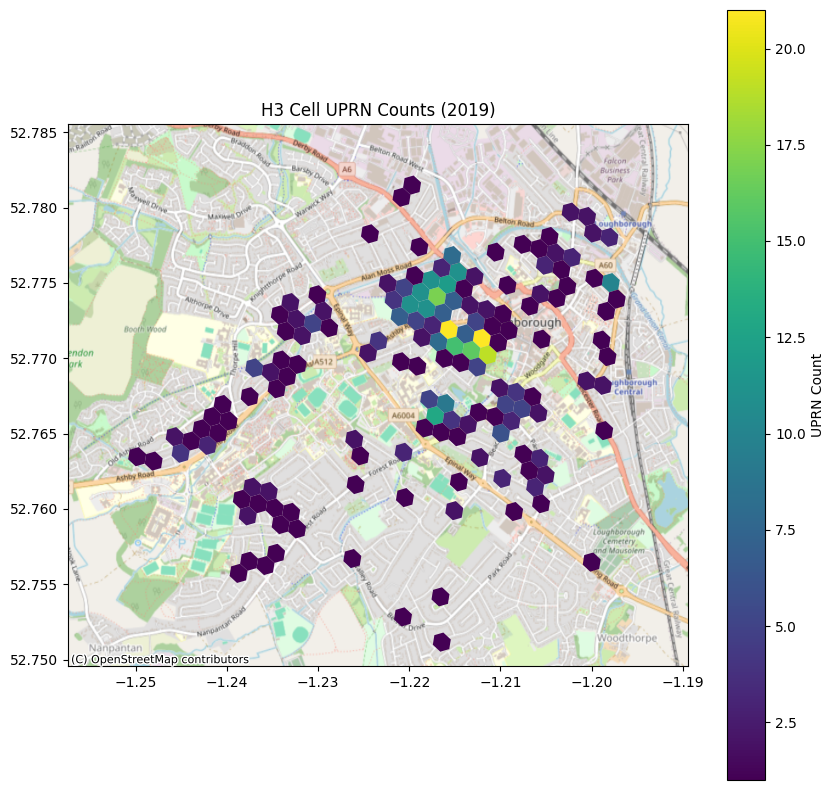

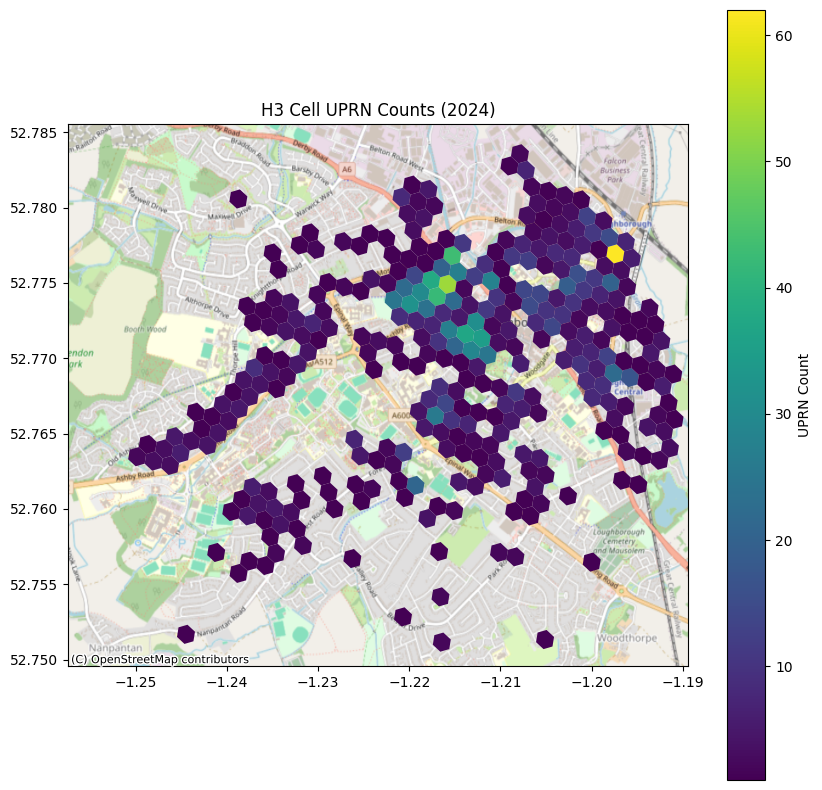

In [60]:
import h3
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
from shapely import wkt
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np

def add_h3_index(df):
    if df is not None and 'LATITUDE' in df.columns and 'LONGITUDE' in df.columns:
        # Filter out rows with missing lat/long before applying h3
        df = df.dropna(subset=['LATITUDE', 'LONGITUDE'])
        df = df[(df['LATITUDE'] >= -90) & (df['LATITUDE'] <= 90) & (df['LONGITUDE'] >= -180) & (df['LONGITUDE'] <= 180)]

        def get_h3(lat, lng):
            return h3.latlng_to_cell(lat, lng, 10)
        df['h3_index'] = df.apply(lambda row: get_h3(row['LATITUDE'], row['LONGITUDE']), axis=1)
    return df

# Assuming df_2019 and df_2024 are already loaded and processed
df_2019 = add_h3_index(df_2019)
df_2024 = add_h3_index(df_2024)

def plot_h3_counts(df, title):
    if df is not None and 'h3_index' in df.columns:
        h3_counts = df['h3_index'].value_counts().to_dict()

        h3_data = []
        for h3_index, count in h3_counts.items():
            boundary = h3.cell_to_boundary(h3_index)
            try:
                polygon = Polygon([(lng, lat) for lat, lng in boundary])
                h3_data.append({'h3_index': h3_index, 'count': count, 'geometry': polygon})
            except Exception as e:
                print(f"Error creating polygon for h3_index {h3_index}: {e}")
                #skip adding this row.

        gdf = gpd.GeoDataFrame(h3_data, crs="EPSG:4326")

        #remove rows with no geometry.
        gdf = gdf[~gdf.geometry.isna()]

        #remove rows with no geometry.
        gdf = gdf[~gdf.geometry.isna()]

        fig, ax = plt.subplots(1, 1, figsize=(10, 10))

        if bbox_wkt: #if a bounding box wkt has been provided
            bounding_polygon = wkt.loads(bbox_wkt)
            gdf = gdf[gdf.geometry.intersects(bounding_polygon)] #filter geodataframe

            minx, miny, maxx, maxy = bounding_polygon.bounds
            ax.set_xlim(minx, maxx)
            ax.set_ylim(miny, maxy)

        gdf.plot(column='count', ax=ax, legend=True, cmap='viridis', legend_kwds={'label': "UPRN Count"})
        ax.set_title(title)
        ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik) #add basemap
        plt.show()

bbox_wkt = "POLYGON ((-1.25742 52.749594, -1.189442 52.749594, -1.189442 52.785531, -1.25742 52.785531, -1.25742 52.749594))"

# Plot for 2019
plot_h3_counts(df_2019, "H3 Cell UPRN Counts (2019)")

# Plot for 2024
plot_h3_counts(df_2024, "H3 Cell UPRN Counts (2024)")